###Evaluation Metrics and Regression Implementation

##Theoritical

1 What does R-squared represent in a regression model:

In [ ]:
'''R-squared measures the proportion of the variance in the dependent variable that is explained by the independent variables in the model.
It indicates the model's goodness of fit.
'''

2 What are the assumptions of linear regression:

In [ ]:
'''Linearity
Independence of errors
Homoscedasticity (constant variance of errors)
Normality of residuals
No multicollinearity among predictors
'''

3 What is the difference between R-squared and Adjusted R-squared:

In [ ]:
'''R-squared measures the variance explained by the model,
 while Adjusted R-squared adjusts for the number of predictors,
 accounting for overfitting by penalizing the inclusion of irrelevant variables.

'''

4 Why do we use Mean Squared Error (MSE):

In [ ]:
'''MSE quantifies the average squared difference between predicted and actual values, providing a measure of model performance that penalizes large errors.'''

5 What does an Adjusted R-squared value of 0.85 indicate:

In [ ]:
'''It means 85% of the variance in the dependent variable is explained by the model, adjusted for the number of predictors.'''

6 How do we check for normality of residuals in linear regression:

In [ ]:
'''Histogram or Q-Q plot of residuals
Shapiro-Wilk or Kolmogorov-Smirnov tests
Skewness and kurtosis measures'''

7 What is multicollinearity, and how does it impact regression:

In [ ]:
'''Multicollinearity occurs when predictors are highly correlated, leading to unstable coefficient estimates and inflated standard errors.'''

8 What is Mean Absolute Error (MAE):

In [ ]:
'''MAE is the average absolute difference between predicted and actual values, offering an intuitive measure of prediction error without squaring deviations.'''

9 What are the benefits of using an ML pipeline:

In [ ]:
'''Automates workflow
Reduces error
Ensures reproducibility
Simplifies hyperparameter tuning and preprocessing'''

10 Why is RMSE considered more interpretable than MSE:

In [ ]:
'''RMSE is in the same units as the dependent variable, making it easier to interpret compared to the squared scale of MSE.'''

11 What is pickling in Python, and how is it useful in ML:

In [ ]:
'''Pickling serializes Python objects for storage or transfer. It’s useful for saving and reloading ML models and data preprocessing pipelines.

'''

12 What does a high R-squared value mean:

In [ ]:
'''It indicates a strong relationship between the predictors and the dependent variable, though it doesn’t guarantee a good model.'''


13 What happens if linear regression assumptions are violated:

In [ ]:
'''Biased or inconsistent coefficient estimates
Reduced predictive accuracy
Invalid significance tests'''

14 How can we address multicollinearity in regression:

In [ ]:
'''Remove or combine correlated variables
Use Principal Component Analysis (PCA)
Apply regularization techniques like Ridge or Lasso'''

15 How can feature selection improve model performance in regression analysis :

In [ ]:
'''It reduces overfitting, improves interpretability, and enhances computational efficiency by removing irrelevant or redundant features.'''

16 How is Adjusted R-squared calculated:

In [ ]:
'''Adjusted R-squared = 1 −((1−𝑅^2)(𝑛−1)/n−𝑝−1)
 where
n is the sample size and
p is the number of predictors.'''

17 Why is MSE sensitive to outliers:

In [ ]:
'''Squaring the errors amplifies the effect of larger errors, making MSE highly influenced by outliers.'''

18 What is the role of homoscedasticity in linear regression:

In [ ]:
'''Squaring the errors amplifies the effect of larger errors, making MSE highly influenced by outliers.'''

19 What is Root Mean Squared Error (RMSE):

In [ ]:
'''RMSE is the square root of MSE, providing an overall measure of prediction error in the same units as the dependent variable.'''

20 Why is pickling considered risky:

In [ ]:
'''Pickled files can execute arbitrary code during deserialization, making them vulnerable to malicious attacks.'''

21 What alternatives exist to pickling for saving ML models:

In [ ]:
'''Joblib
ONNX
PMML
JSON or HDF5 for custom implementations'''

22 What is heteroscedasticity, and why is it a problem:

In [ ]:
'''Heteroscedasticity is the non-constant variance of errors. It undermines the reliability of coefficient estimates and invalidates significance tests.'''

23  How can interaction terms enhance a regression model's predictive power?


In [ ]:
'''By capturing the combined effect of two or more variables that influence the dependent variable non-additively.'''

##Practical

1.Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
using Seaborn's "diamonds" dataset.

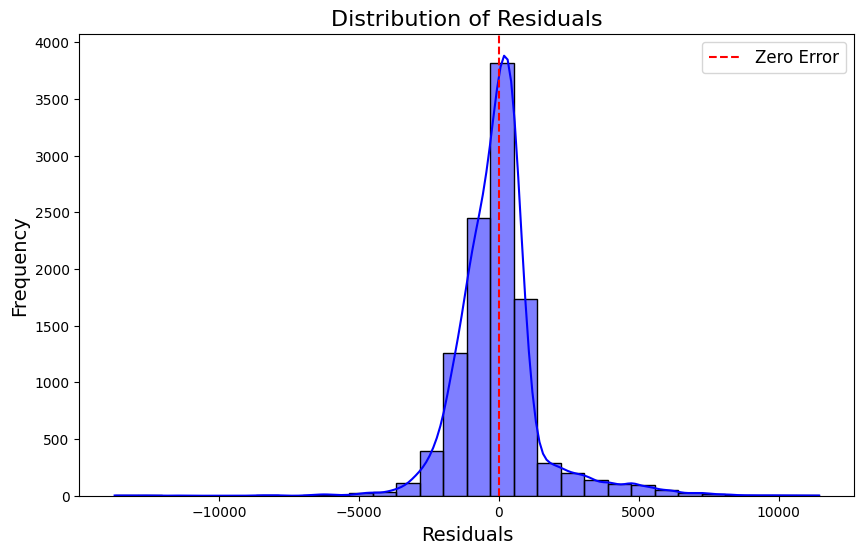

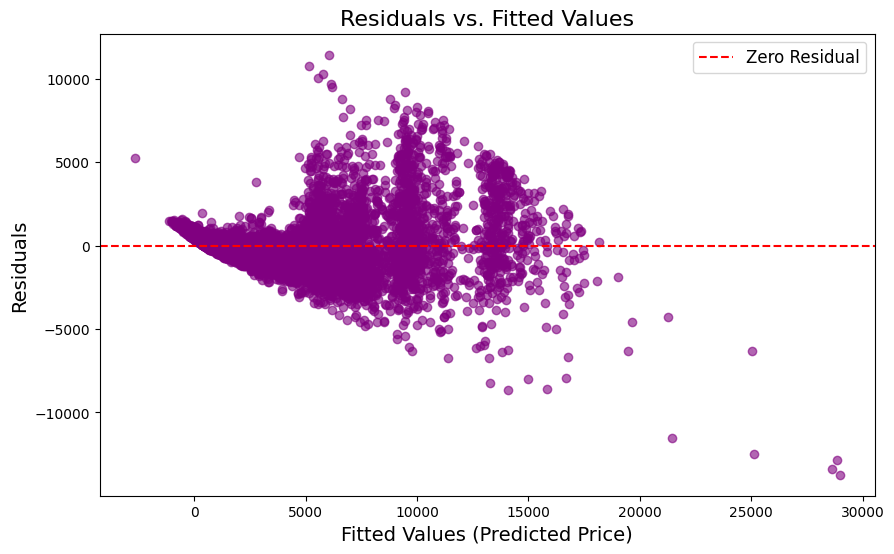

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the Seaborn 'diamonds' dataset
data = sns.load_dataset('diamonds')

# Select a subset of features and target for the regression
# We'll use 'carat', 'depth', and 'table' as predictors and 'price' as the target.
features = ['carat', 'depth', 'table']
target = 'price'

# Prepare the data
X = data[features]
y = data[target]

# Handle missing values if any (though diamonds dataset should not have them)
X = X.dropna()
y = y.loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Visualize the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Distribution of Residuals', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.legend(fontsize=12)
plt.show()

# Additionally, create a residuals vs. fitted values plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual')
plt.title('Residuals vs. Fitted Values', fontsize=16)
plt.xlabel('Fitted Values (Predicted Price)', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.legend(fontsize=12)
plt.show()


2.Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
Mean Squared Error (RMSE) for a linear regression model.

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Example data: feature matrix X and target vector y
# Replace with your own dataset
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([1.1, 2.0, 2.8, 3.9, 5.0, 6.1, 7.1, 8.0, 9.0, 10.1])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 0.002787232461355528
Mean Absolute Error (MAE): 0.051293103448275756
Root Mean Squared Error (RMSE): 0.05279424647966413


3.Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity

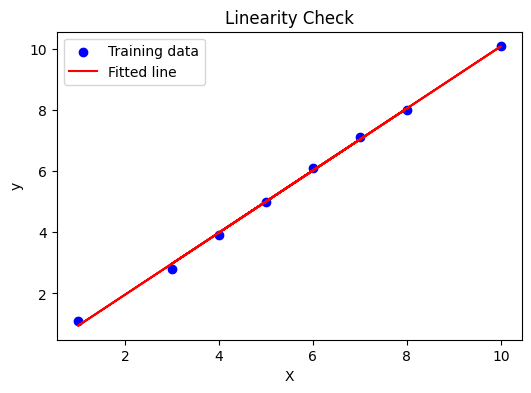

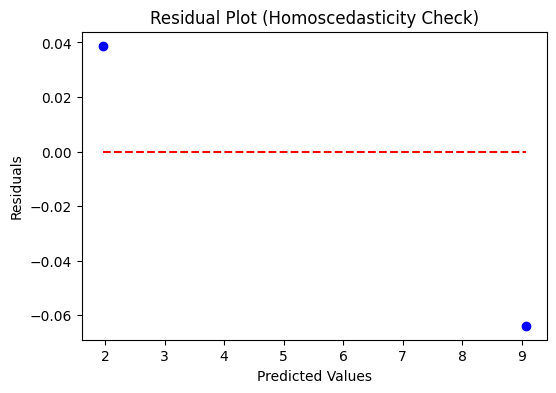

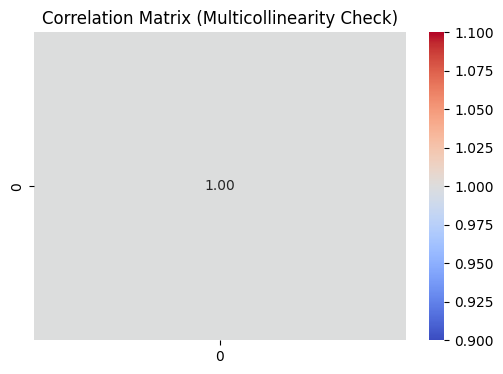

Variance Inflation Factor (VIF):
    Feature       VIF
0  Constant  5.172414
1         X  1.000000


<Figure size 600x400 with 0 Axes>

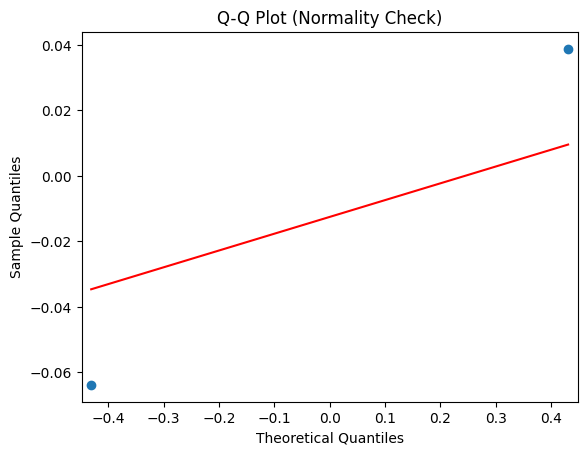

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Example data: feature matrix X and target vector y
# Replace with your own dataset
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([1.1, 2.0, 2.8, 3.9, 5.0, 6.1, 7.1, 8.0, 9.0, 10.1])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# 1. Linearity Assumption (Scatter Plot)
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, model.predict(X_train), color='red', label='Fitted line')
plt.title('Linearity Check')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# 2. Homoscedasticity Assumption (Residual Plot)
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, color='blue')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='dashed')
plt.title('Residual Plot (Homoscedasticity Check)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 3. Multicollinearity Check (Correlation Matrix)
# In this example, we have one feature. For multiple features, you can expand the dataset
df = pd.DataFrame(X)
correlation_matrix = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Multicollinearity Check)')
plt.show()

# VIF Calculation (Variance Inflation Factor)
# VIF is used to check for multicollinearity in datasets with multiple features
X_with_const = add_constant(X_train)  # Add a constant column to X
X_with_const = np.array(X_with_const)  # Convert DataFrame to numpy array
vif_data = pd.DataFrame()
vif_data['Feature'] = ['Constant', 'X']  # Adjust the feature names accordingly
# Access the NumPy array directly using indexing instead of .values
vif_data['VIF'] = [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]
print(f"Variance Inflation Factor (VIF):\n{vif_data}")

# Optional: Q-Q plot to check for normality of residuals
plt.figure(figsize=(6, 4))
qqplot(residuals, line='s')
plt.title('Q-Q Plot (Normality Check)')
plt.show()


4.Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the
performance of different regression models

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Example data: feature matrix X and target vector y
# Replace with your own dataset
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([1.1, 2.0, 2.8, 3.9, 5.0, 6.1, 7.1, 8.0, 9.0, 10.1])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Support Vector Regression (SVR)': SVR()
}

# Initialize a dictionary to store results
results = {}

# Iterate through the models and create a pipeline for each
for model_name, model in models.items():
    # Create a pipeline with scaling and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Feature scaling
        ('regressor', model)           # Regression model
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = pipeline.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[model_name] = {
        'Mean Squared Error (MSE)': mse,
        'Root Mean Squared Error (RMSE)': rmse,
        'R-squared (R²)': r2
    }

# Display the results
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:")
print(results_df)


Model Evaluation Results:
                                 Mean Squared Error (MSE)  \
Linear Regression                                0.002787   
Ridge Regression                                 0.118008   
Lasso Regression                                 1.559094   
Decision Tree Regression                         0.905000   
Support Vector Regression (SVR)                  2.002647   

                                 Root Mean Squared Error (RMSE)  \
Linear Regression                                      0.052794   
Ridge Regression                                       0.343523   
Lasso Regression                                       1.248637   
Decision Tree Regression                               0.951315   
Support Vector Regression (SVR)                        1.415149   

                                 R-squared (R²)  
Linear Regression                      0.999772  
Ridge Regression                       0.990367  
Lasso Regression                       0.872727  
Deci

5.Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and
R-squared score

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Example data: feature matrix X and target vector y
# Replace with your own dataset
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([1.1, 2.0, 2.8, 3.9, 5.0, 6.1, 7.1, 8.0, 9.0, 10.1])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Get the model's coefficients, intercept, and R-squared score
coefficients = model.coef_
intercept = model.intercept_
r_squared = r2_score(y_test, y_pred)

# Print the results
print(f"Model Coefficients: {coefficients}")
print(f"Model Intercept: {intercept}")
print(f"R-squared Score: {r_squared}")


Model Coefficients: [1.01465517]
Model Intercept: -0.06810344827586157
R-squared Score: 0.9997724708194812


6.Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
simple linear regression and visualizes the results

Model Coefficients: [0.10696371]
Model Intercept: 0.925235558557056
R-squared Score: 0.5449381659234664


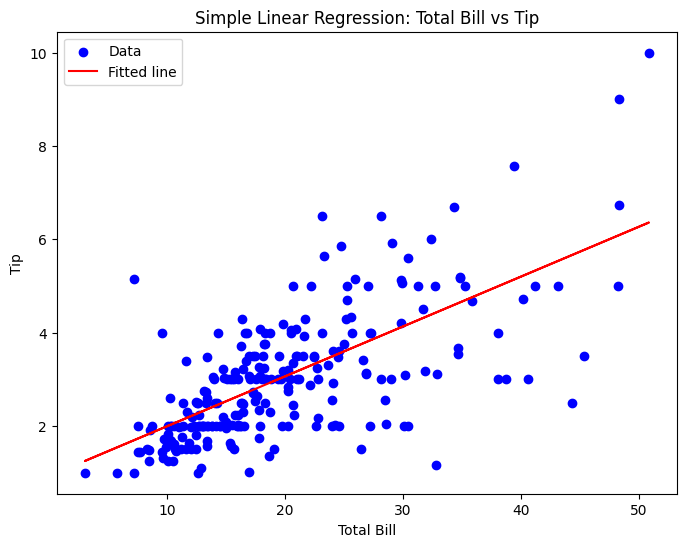

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the 'tips' dataset from seaborn
tips = sns.load_dataset('tips')

# Extract the relevant columns (total bill and tip)
X = tips[['total_bill']]  # Feature: Total Bill
y = tips['tip']           # Target: Tip

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Get the model's coefficients, intercept, and R-squared score
coefficients = model.coef_
intercept = model.intercept_
r_squared = r2_score(y_test, y_pred)

# Print the results
print(f"Model Coefficients: {coefficients}")
print(f"Model Intercept: {intercept}")
print(f"R-squared Score: {r_squared}")

# Visualize the relationship and the fitted regression line
plt.figure(figsize=(8, 6))

# Scatter plot of total_bill vs tip
plt.scatter(X, y, color='blue', label='Data')

# Plot the regression line
plt.plot(X, model.predict(X), color='red', label='Fitted line')

# Labels and title
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Simple Linear Regression: Total Bill vs Tip')
plt.legend()

# Show the plot
plt.show()


7.Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
model to predict new values and plot the data points along with the regression line

Model Coefficients: [[1.95402268]]
Model Intercept: [1.21509616]


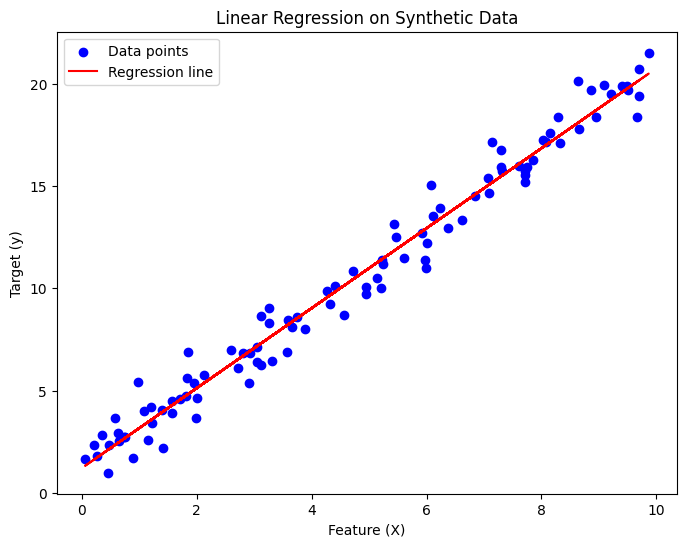

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate a synthetic dataset
# Let's create a linear relationship: y = 2 * X + 1
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # 100 random values scaled to range [0, 10]
y = 2 * X + 1 + np.random.randn(100, 1)  # y = 2*X + 1 with some noise

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predictions from the model
y_pred = model.predict(X)

# Get the model's coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the results
print(f"Model Coefficients: {coefficients}")
print(f"Model Intercept: {intercept}")

# Plot the data and the regression line
plt.figure(figsize=(8, 6))

# Plot the actual data points
plt.scatter(X, y, color='blue', label='Data points')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Regression line')

# Labels and title
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression on Synthetic Data')

# Show the legend
plt.legend()

# Display the plot
plt.show()


8.Write a Python script that pickles a trained linear regression model and saves it to a file

In [12]:
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression

# Generate a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 random values scaled to range [0, 10]
y = 2 * X + 1 + np.random.randn(100, 1)  # y = 2*X + 1 with some noise

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Save the trained model using pickle
model_filename = 'linear_regression_model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")


Model saved to linear_regression_model.pkl


9.Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
regression curve

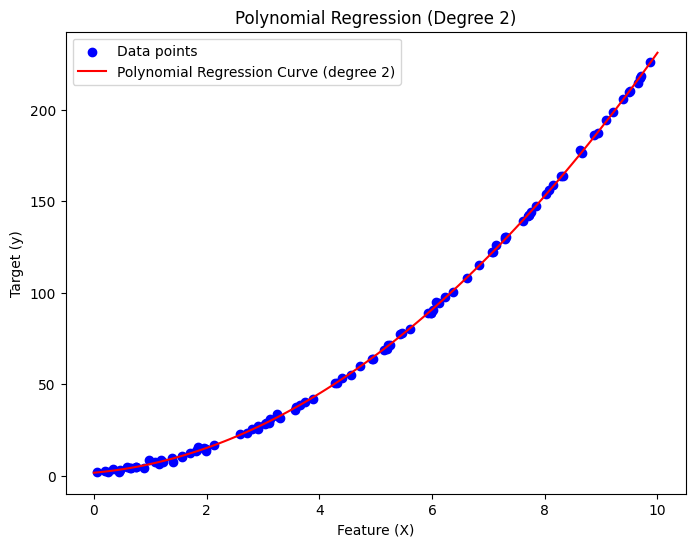

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data (example: y = 2*X^2 + 3*X + 1)
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 random values scaled to range [0, 10]
y = 2 * X**2 + 3 * X + 1 + np.random.randn(100, 1)  # Quadratic relation with noise

# Transform the features to include polynomial terms (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predictions using the trained model
y_pred = model.predict(X_poly)

# Plot the data points and the polynomial regression curve
plt.figure(figsize=(8, 6))

# Scatter plot of the original data
plt.scatter(X, y, color='blue', label='Data points')

# Sort the values for plotting the regression curve (for smoother visualization)
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

# Plot the polynomial regression curve
plt.plot(X_plot, y_plot, color='red', label='Polynomial Regression Curve (degree 2)')

# Labels and title
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Polynomial Regression (Degree 2)')

# Show the legend
plt.legend()

# Display the plot
plt.show()


10.Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
regression model to the data. Print the model's coefficient and intercept

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data for simple linear regression
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # 100 random values scaled to range [0, 10]
y = 3 * X + 5 + np.random.randn(100, 1)  # Linear relation: y = 3*X + 5 with some noise

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the model's coefficient and intercept
print(f"Model Coefficient: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


Model Coefficient: [[2.95402268]]
Model Intercept: [5.21509616]


11.Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and
compares their performance

Degree 1 - MSE: 194.6227
Degree 2 - MSE: 0.6358
Degree 3 - MSE: 0.6420


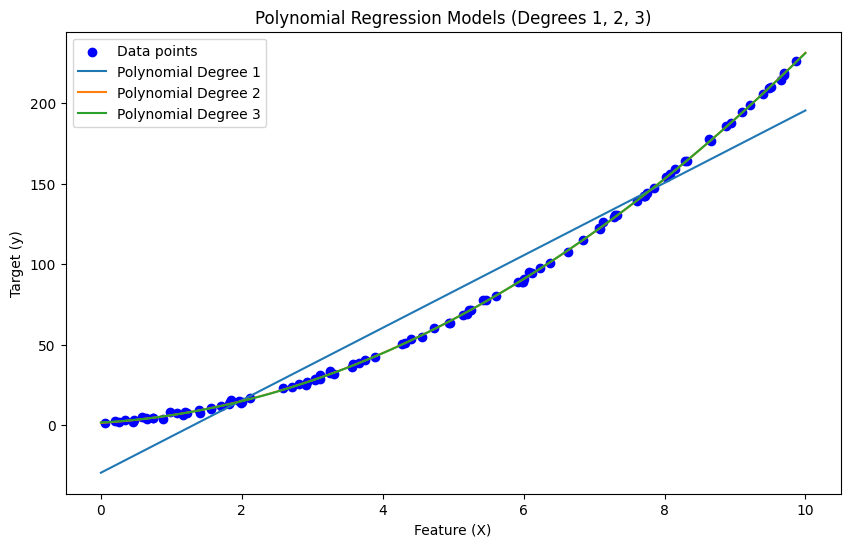

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data (example: y = 2*X^2 + 3*X + 1)
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 random values scaled to range [0, 10]
y = 2 * X**2 + 3 * X + 1 + np.random.randn(100, 1)  # Quadratic relation with noise

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define function to fit and evaluate polynomial regression models
def polynomial_regression(degree, X_train, X_test, y_train, y_test):
    # Transform features to polynomial features of the given degree
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict the test set results
    y_pred = model.predict(X_test_poly)

    # Calculate the Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    return model, mse, poly

# Fit and evaluate polynomial regression models of degree 1, 2, and 3
degrees = [1, 2, 3]
results = {}

for degree in degrees:
    model, mse, poly = polynomial_regression(degree, X_train, X_test, y_train, y_test)
    results[degree] = {'model': model, 'mse': mse, 'poly': poly}
    print(f"Degree {degree} - MSE: {mse:.4f}")

# Plot the data and regression curves for all degrees
plt.figure(figsize=(10, 6))

# Plot the original data points
plt.scatter(X, y, color='blue', label='Data points')

# Generate values for plotting the regression curves
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)

for degree in degrees:
    model = results[degree]['model']
    poly = results[degree]['poly']
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    # Plot the polynomial regression curve
    plt.plot(X_plot, y_plot, label=f'Polynomial Degree {degree}')

# Labels and title
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Polynomial Regression Models (Degrees 1, 2, 3)')

# Show the legend
plt.legend()

# Display the plot
plt.show()


12.Write a Python script that fits a simple linear regression model with two features and prints the model's
coefficients, intercept, and R-squared score

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data for simple linear regression with two features
np.random.seed(42)
X = np.random.rand(100, 2) * 10  # 100 random values scaled to range [0, 10] for two features
y = 3 * X[:, 0] + 5 * X[:, 1] + 7 + np.random.randn(100)  # Linear relation: y = 3*X1 + 5*X2 + 7 with noise

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the model's coefficients, intercept, and R-squared score
coefficients = model.coef_
intercept = model.intercept_
r_squared = model.score(X_test, y_test)

# Print the results
print(f"Model Coefficients: {coefficients}")
print(f"Model Intercept: {intercept}")
print(f"R-squared Score: {r_squared:.4f}")


Model Coefficients: [3.02545136 5.04741599]
Model Intercept: 6.716671499389683
R-squared Score: 0.9961


13.Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the
regression line along with the data points

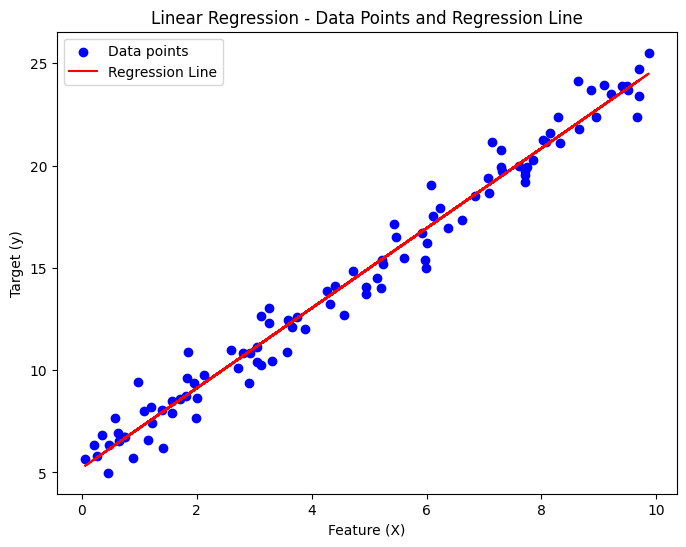

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data for simple linear regression
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 random values scaled to range [0, 10]
y = 2 * X + 5 + np.random.randn(100, 1)  # Linear relation: y = 2*X + 5 with noise

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict using the trained model
y_pred = model.predict(X)

# Visualize the data points and the regression line
plt.figure(figsize=(8, 6))

# Scatter plot of the original data
plt.scatter(X, y, color='blue', label='Data points')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Regression Line')

# Labels and title
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression - Data Points and Regression Line')

# Show the legend
plt.legend()

# Display the plot
plt.show()


14.Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset
with multiple features

In [18]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Generate synthetic data with multiple features
np.random.seed(42)
X1 = np.random.rand(100) * 10  # Feature 1
X2 = 2 * X1 + np.random.rand(100) * 2  # Feature 2 is correlated with Feature 1
X3 = np.random.rand(100) * 10  # Feature 3 is less correlated with X1 and X2
y = 3 * X1 + 5 * X2 + 7 + np.random.randn(100)  # Target variable with some noise

# Combine features into a DataFrame
X = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})

# Add a constant to the features for the intercept term
X_with_const = add_constant(X)

# Calculate Variance Inflation Factor (VIF) for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Print the VIF for each feature
print(vif_data)


  Feature         VIF
0   const   11.112919
1      X1  105.613385
2      X2  105.749546
3      X3    1.023792


15.Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
polynomial regression model, and plots the regression curve.

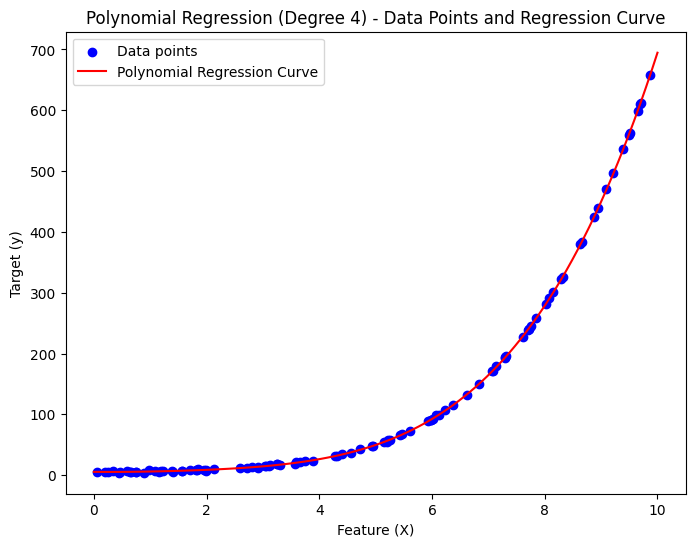

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data for a polynomial relationship (degree 4)
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 random values scaled to range [0, 10]
y = 0.1 * X**4 - 0.5 * X**3 + 2 * X**2 - X + 5 + np.random.randn(100, 1)  # Polynomial relation with noise

# Create polynomial features of degree 4
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Create and train the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict using the trained model
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)  # Generate points for plotting the regression curve
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

# Visualize the data points and the polynomial regression curve
plt.figure(figsize=(8, 6))

# Scatter plot of the original data
plt.scatter(X, y, color='blue', label='Data points')

# Plot the polynomial regression curve
plt.plot(X_plot, y_plot, color='red', label='Polynomial Regression Curve')

# Labels and title
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Polynomial Regression (Degree 4) - Data Points and Regression Curve')

# Show the legend
plt.legend()

# Display the plot
plt.show()


16.Write a Python script that creates a machine learning pipeline with data standardization and a multiple
linear regression model, and prints the R-squared score

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Generate synthetic data for multiple linear regression
np.random.seed(42)
X1 = np.random.rand(100) * 10  # Feature 1
X2 = np.random.rand(100) * 20  # Feature 2
X3 = np.random.rand(100) * 30  # Feature 3
y = 3 * X1 + 5 * X2 + 2 * X3 + 10 + np.random.randn(100)  # Target variable with noise

# Combine the features into a DataFrame
X = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a machine learning pipeline with standardization and linear regression
pipeline = make_pipeline(
    StandardScaler(),  # Standardize the features
    LinearRegression()  # Multiple linear regression model
)

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Predict using the trained model
y_pred = pipeline.predict(X_test)

# Calculate the R-squared score of the model
r_squared = r2_score(y_test, y_pred)

# Print the R-squared score
print(f"R-squared Score: {r_squared:.4f}")


R-squared Score: 0.9986


17.Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the
regression curve

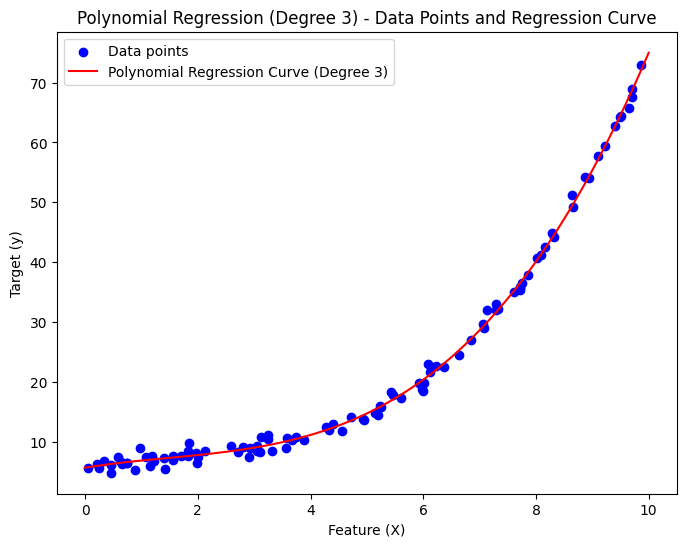

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data for polynomial regression (degree 3)
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 random values scaled to range [0, 10]
y = 0.1 * X**3 - 0.5 * X**2 + 2 * X + 5 + np.random.randn(100, 1)  # Polynomial relation with noise

# Create polynomial features of degree 3
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Create and train the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict using the trained model
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)  # Generate points for plotting the regression curve
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

# Visualize the data points and the polynomial regression curve
plt.figure(figsize=(8, 6))

# Scatter plot of the original data
plt.scatter(X, y, color='blue', label='Data points')

# Plot the polynomial regression curve
plt.plot(X_plot, y_plot, color='red', label='Polynomial Regression Curve (Degree 3)')

# Labels and title
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Polynomial Regression (Degree 3) - Data Points and Regression Curve')

# Show the legend
plt.legend()

# Display the plot
plt.show()


18.Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
the R-squared score and model coefficients

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data with 5 features for multiple linear regression
np.random.seed(42)
X1 = np.random.rand(100) * 10  # Feature 1
X2 = np.random.rand(100) * 20  # Feature 2
X3 = np.random.rand(100) * 30  # Feature 3
X4 = np.random.rand(100) * 40  # Feature 4
X5 = np.random.rand(100) * 50  # Feature 5
y = 3 * X1 + 5 * X2 + 2 * X3 + 4 * X4 + 1 * X5 + 10 + np.random.randn(100)  # Target variable with noise

# Combine the features into a DataFrame
X = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4, 'X5': X5})

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

# Calculate the R-squared score
r_squared = r2_score(y_test, y_pred)

# Print the R-squared score and model coefficients
print(f"R-squared Score: {r_squared:.4f}")
print(f"Model Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


R-squared Score: 0.9997
Model Coefficients: [3.11205352 5.00973518 1.99145583 3.97728978 1.00417725]
Intercept: 9.895263963710391


19.Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
data points along with the regression line

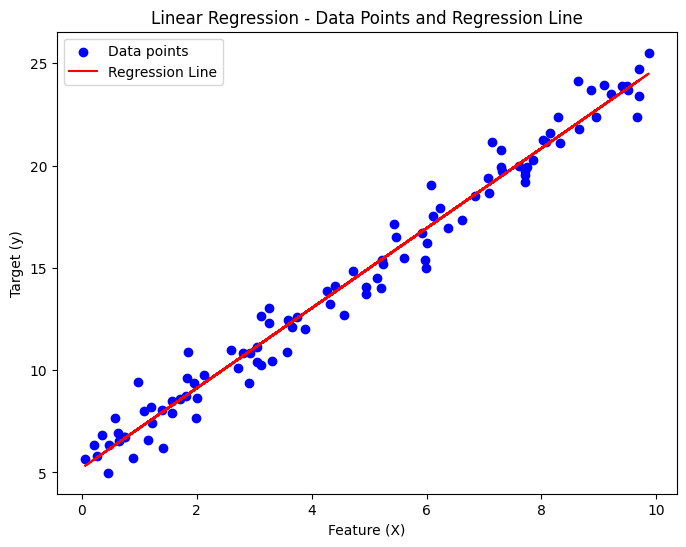

Model Coefficient: 1.9540226772876963
Model Intercept: 5.21509615754675


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data for linear regression
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 random values scaled to range [0, 10]
y = 2 * X + 5 + np.random.randn(100, 1)  # Linear relationship with noise (y = 2*X + 5)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict using the trained model
y_pred = model.predict(X)

# Visualize the data points and the regression line
plt.figure(figsize=(8, 6))

# Scatter plot of the original data
plt.scatter(X, y, color='blue', label='Data points')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Regression Line')

# Labels and title
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression - Data Points and Regression Line')

# Show the legend
plt.legend()

# Display the plot
plt.show()

# Print the model's coefficients and intercept
print(f"Model Coefficient: {model.coef_[0][0]}")
print(f"Model Intercept: {model.intercept_[0]}")


20.Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data with 3 features for multiple linear regression
np.random.seed(42)
X1 = np.random.rand(100) * 10  # Feature 1
X2 = np.random.rand(100) * 20  # Feature 2
X3 = np.random.rand(100) * 30  # Feature 3
y = 3 * X1 + 5 * X2 + 2 * X3 + 10 + np.random.randn(100)  # Target variable with noise

# Combine the features into a DataFrame
X = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

# Calculate the R-squared score
r_squared = r2_score(y_test, y_pred)

# Print the R-squared score and model coefficients
print(f"R-squared Score: {r_squared:.4f}")
print(f"Model Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


R-squared Score: 0.9986
Model Coefficients: [3.06640394 5.02103851 2.01417398]
Intercept: 9.514418932507041


21.Write a Python script that demonstrates how to serialize and deserialize machine learning models using
joblib instead of pickling

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib

# Generate synthetic data for linear regression
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 random values scaled to range [0, 10]
y = 2 * X + 5 + np.random.randn(100, 1)  # Linear relationship with noise (y = 2*X + 5)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Serialize (save) the trained model using joblib
joblib.dump(model, 'linear_regression_model.joblib')

# Deserialize (load) the model from the file
loaded_model = joblib.load('linear_regression_model.joblib')

# Predict using the loaded model
y_pred = loaded_model.predict(X_test)

# Print the model's coefficient, intercept, and first few predictions
print(f"Model Coefficient: {loaded_model.coef_[0][0]}")
print(f"Model Intercept: {loaded_model.intercept_[0]}")
print(f"Predictions on Test Data: {y_pred[:5]}")


Model Coefficient: 1.9598647314960553
Model Intercept: 5.142913319458566
Predictions on Test Data: [[ 6.38857101]
 [22.68031897]
 [20.27786619]
 [18.12745391]
 [10.21465091]]


22.Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
the Seaborn 'tips' dataset

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
Mean Squared Error (MSE): 0.6533
Model Coefficients: [-0.01142836  0.01142836  0.12948735 -0.12948735  0.06222575 -0.0614069
  0.12868034 -0.12949919 -0.09320812  0.09320812  0.1092622 ]
Intercept: 0.895544497223816


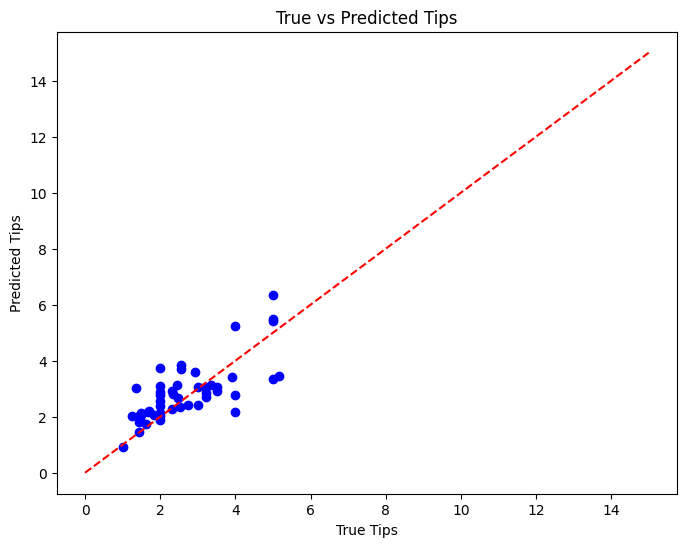

In [26]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the Seaborn 'tips' dataset
tips = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(tips.head())

# Selecting the independent variables (features) and dependent variable (target)
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time']]
y = tips['tip']

# Define a column transformer with one-hot encoding for categorical features
# 'total_bill' is numeric and does not need encoding, other columns are categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'day', 'time']),
        ('num', 'passthrough', ['total_bill'])
    ])

# Create a pipeline that first applies preprocessing and then fits a linear regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the training data
pipeline.fit(X_train, y_train)

# Make predictions using the test data
y_pred = pipeline.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.4f}')

# Print the model's coefficients and intercept (after transformation)
model = pipeline.named_steps['regressor']
print(f'Model Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Plot the true vs predicted tips for visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([0, 15], [0, 15], color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel('True Tips')
plt.ylabel('Predicted Tips')
plt.title('True vs Predicted Tips')
plt.show()


23.Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

Linear Regression Coefficients: [[1.95986473]]
Linear Regression Intercept: [5.14291332]
R-squared Score (Linear Regression): 0.9825431689004598

Ridge Regression Coefficients: [1.95698061]
Ridge Regression Intercept: [5.15641385]
R-squared Score (Ridge Regression): 0.9825796790536575


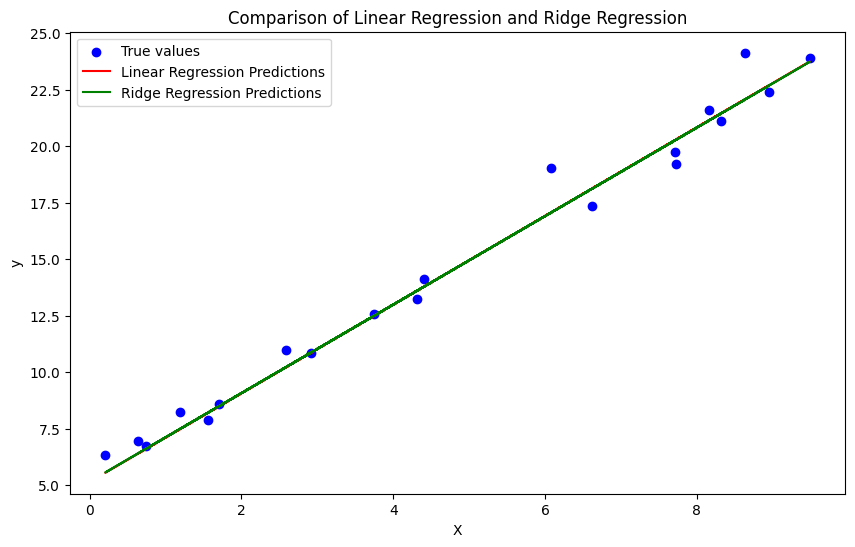

In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Generate synthetic data for linear regression
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 random values scaled to range [0, 10]
y = 2 * X + 5 + np.random.randn(100, 1)  # Linear relationship with noise (y = 2*X + 5)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Ridge Regression Model
ridge_model = Ridge(alpha=1.0)  # Regularization strength (alpha)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Calculate R-squared score for both models
r2_linear = r2_score(y_test, y_pred_linear)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print coefficients and R-squared score for both models
print("Linear Regression Coefficients:", linear_model.coef_)
print("Linear Regression Intercept:", linear_model.intercept_)
print("R-squared Score (Linear Regression):", r2_linear)

print("\nRidge Regression Coefficients:", ridge_model.coef_)
print("Ridge Regression Intercept:", ridge_model.intercept_)
print("R-squared Score (Ridge Regression):", r2_ridge)

# Visualize the predictions of both models
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.plot(X_test, y_pred_linear, color='red', label='Linear Regression Predictions')
plt.plot(X_test, y_pred_ridge, color='green', label='Ridge Regression Predictions')
plt.title('Comparison of Linear Regression and Ridge Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


24.Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic
dataset.

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

# Generate synthetic dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Print the negative mean squared errors for each fold
print(f"Cross-Validation Scores (Negative MSE): {cv_scores}")

# Convert negative MSE to positive MSE
positive_cv_scores = -cv_scores
print(f"Cross-Validation Scores (Positive MSE): {positive_cv_scores}")

# Calculate and print the average MSE across all folds
average_mse = np.mean(positive_cv_scores)
print(f"Average MSE from Cross-Validation: {average_mse:.4f}")


Cross-Validation Scores (Negative MSE): [-102.30862437  -85.00727953 -116.42227151  -58.35468545  -44.46093271]
Cross-Validation Scores (Positive MSE): [102.30862437  85.00727953 116.42227151  58.35468545  44.46093271]
Average MSE from Cross-Validation: 81.3108


25.Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each

Degree 1 Polynomial Regression R-squared Score: 0.9825


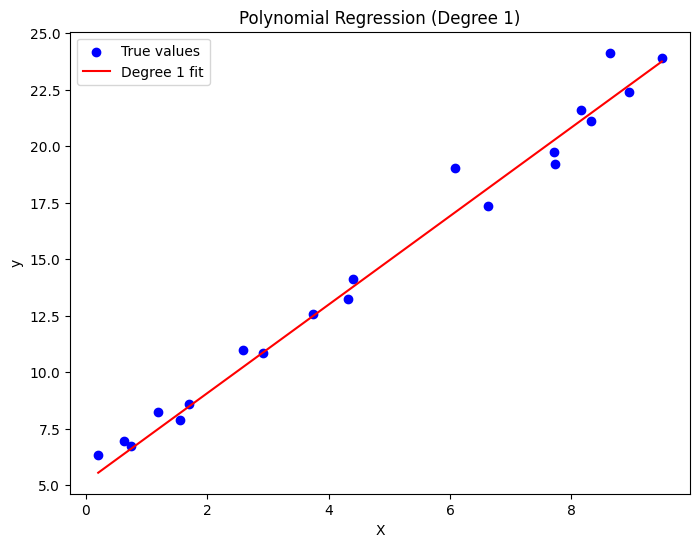

Degree 2 Polynomial Regression R-squared Score: 0.9830


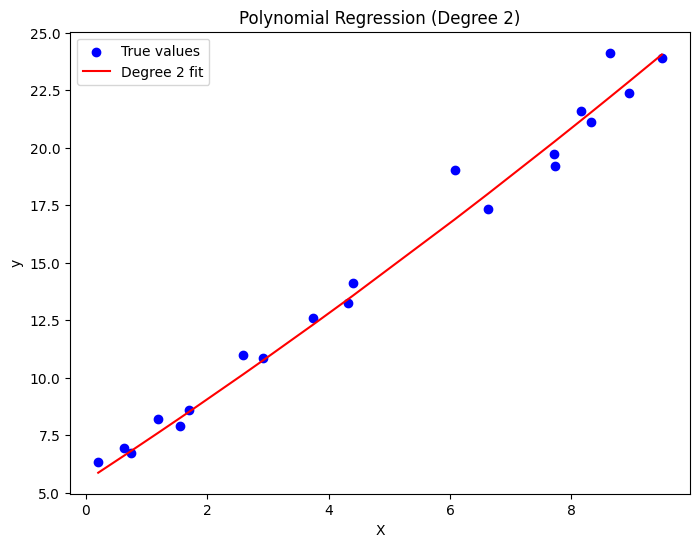

Degree 3 Polynomial Regression R-squared Score: 0.9829


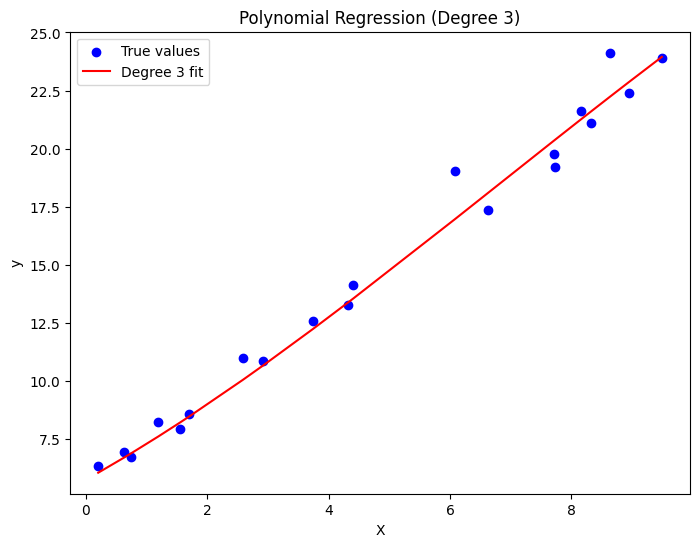

Degree 4 Polynomial Regression R-squared Score: 0.9816


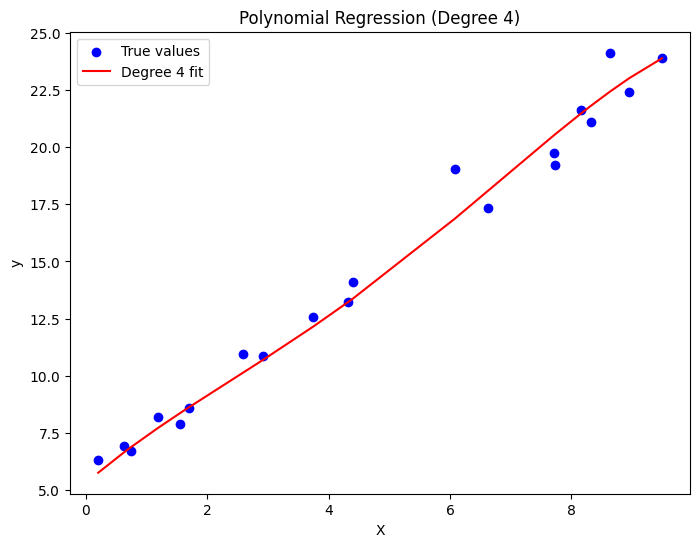

Degree 5 Polynomial Regression R-squared Score: 0.9817


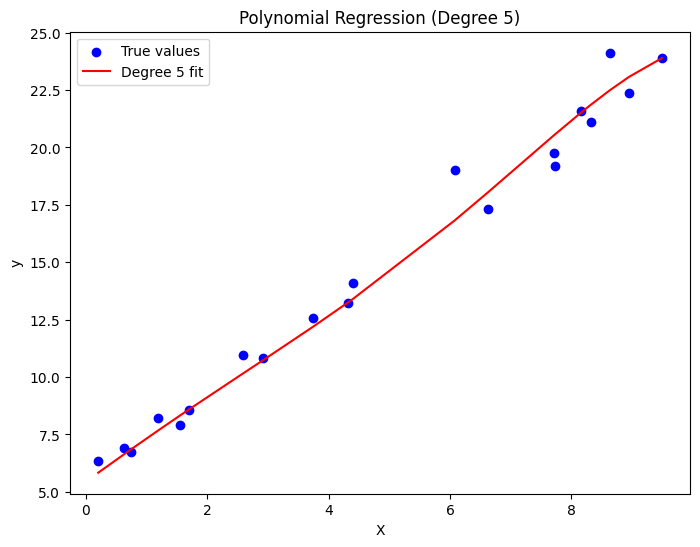

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data (y = 2 * X + 5 with some noise)
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 random values scaled to range [0, 10]
y = 2 * X + 5 + np.random.randn(100, 1)  # Linear relationship with noise

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through polynomial degrees from 1 to 5
for degree in range(1, 6):
    # Create a PolynomialFeatures object with the specified degree
    poly_features = PolynomialFeatures(degree=degree)

    # Transform the input data to include polynomial terms
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    # Train a Linear Regression model on the polynomial features
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Make predictions
    y_pred = model.predict(X_poly_test)

    # Calculate the R-squared score for the model
    r2 = r2_score(y_test, y_pred)

    # Print the R-squared score for the current degree
    print(f"Degree {degree} Polynomial Regression R-squared Score: {r2:.4f}")

    # Plot the polynomial regression curve for each degree
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, y_test, color='blue', label='True values')
    plt.plot(np.sort(X_test, axis=0), model.predict(poly_features.transform(np.sort(X_test, axis=0))), color='red', label=f'Degree {degree} fit')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()
